# MS ESTONIA SURVIVAL 

The MS Estonia Survival dataset was one of the first datasets I tried learning Machine Learning concepts with so I decided to make it end to end. I don't have much experience with this so it's good practice for me too.

First I imported all the requirements:

In [15]:
#IMPORTED STUFF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
%matplotlib inline

I will be training models with all these algorithms and then using the most accurate one in the Flask app.

Models:  
    1. Random Forest Classifier   
    2. Logistic Regression    
    3. K Neighbours Classifier  
    4. Decision Tree Classifier   
    5. Gradient Boosting Classifier

In [16]:
#IMPORTED ML ALGORITHMS
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#IMPORTING MAE
from sklearn.metrics import mean_absolute_error

First, we need to read the data from the CSV file.

In [17]:
#Reading the data
path = '/Users/aryanbhobe/Desktop/Code/Machine Learning/MS-Estonia-Survival/estonia-passenger-list.csv'
data = pd.read_csv(path)

## Basic Data Exploration

In [18]:
#Checking first few rows of data
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [19]:
#We don't require the columns PassengerId, Firstname and Lastname so we drop those columns.
data = data.drop(['PassengerId', 'Firstname', 'Lastname'], axis=1)

In [20]:
data.shape

(989, 5)

In [21]:
#Checking Data Types and Null Counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   989 non-null    object
 1   Sex       989 non-null    object
 2   Age       989 non-null    int64 
 3   Category  989 non-null    object
 4   Survived  989 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ KB


In [22]:
#Checking how many null values we have
data.isnull().sum()

Country     0
Sex         0
Age         0
Category    0
Survived    0
dtype: int64

In [23]:
data.describe()

,Age,Survived
count,989.000000,989.000000
mean,44.575329,0.138524
std,17.235146,0.345624
min,0.000000,0.000000
25%,30.000000,0.000000
50%,44.000000,0.000000
75%,59.000000,0.000000
max,87.000000,1.000000


In [24]:
#Checking Value Counts

#Country Value Counts
data.Country.value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Morocco            2
Great Britain      2
Netherlands        2
Canada             1
France             1
Belarus            1
Nigeria            1
Name: Country, dtype: int64

In [25]:
#Sex Value Counts
data.Sex.value_counts()

M    503
F    486
Name: Sex, dtype: int64

In [26]:
#Category Value Counts
data.Category.value_counts()

P    796
C    193
Name: Category, dtype: int64

## Basic Data Visualisation

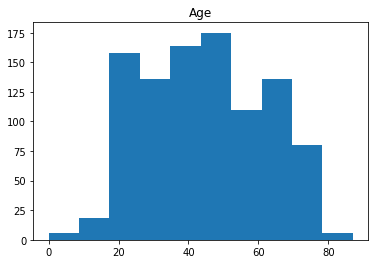

In [27]:
#Plotting Histogram For Age
plt.hist(data.Age)
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

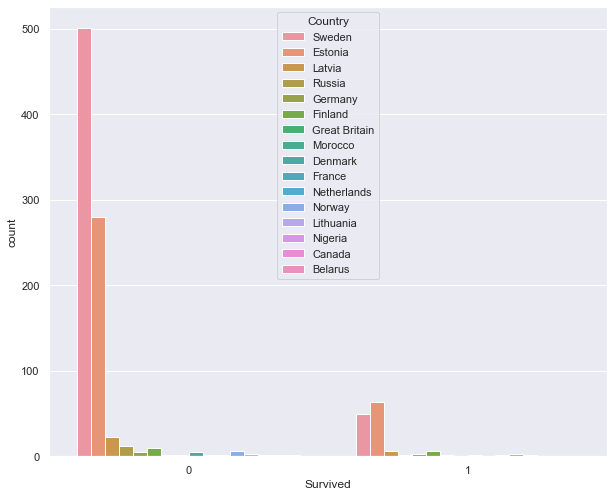

In [28]:
#How does Country affect survival
sns.set(rc={'figure.figsize':(10,8.27)})
sns.countplot(x = data['Survived'] , hue = 'Country', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

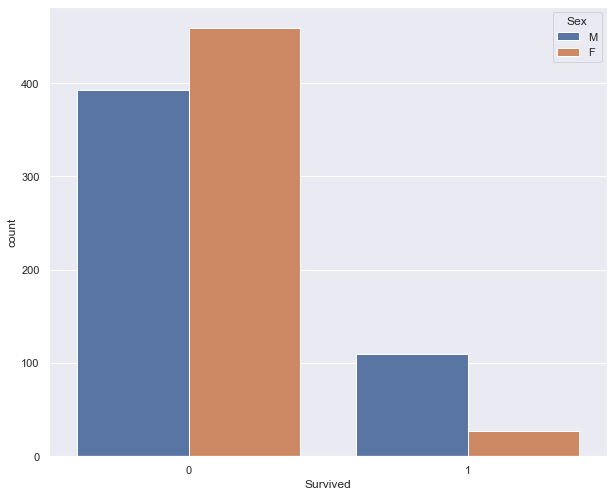

In [29]:
#How does Sex affect Survival
sns.countplot(x = data['Survived'], hue = 'Sex' , data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

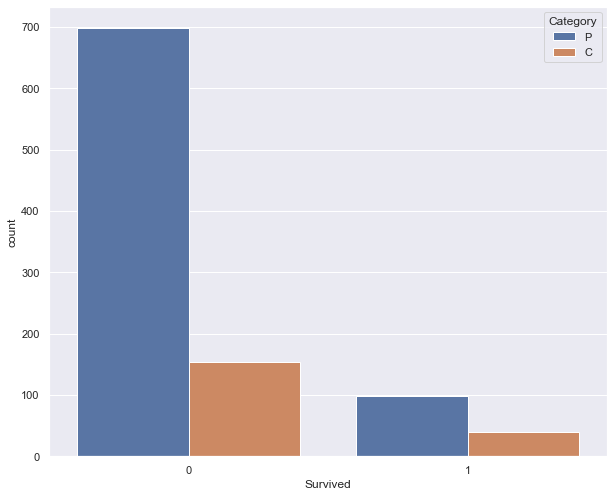

In [30]:
#How does Category affect survival
sns.countplot(x = data['Survived'], hue = 'Category', data = data)

## Preprocessing the data

In [31]:
#Converting the categorical (Country, Sex, Category) data into numeric data
encoder = LabelEncoder()
for i in list(data.columns):
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])

In [34]:
data.head()

,Country,Sex,Age,Category,Survived
0,15,1,62,1,0
1,3,0,22,0,0
2,3,0,21,0,0
3,15,1,53,0,0
4,15,0,55,1,0


In [35]:
#Setting Target Variables and Independant Variables
X = data.loc[:, ['Country', 'Sex', 'Age', 'Category']]
y = data.loc[:, 'Survived']

In [36]:
#Splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

## Training and testing the models

#### 1. Random Forest Classifier

In [37]:
#I referred to: https://www.kaggle.com/nelsonmalgro/newbie-titanic
randomforest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)
randomforest.fit(X_train, y_train)
preds = randomforest.predict(X_test)

In [38]:
print("Accuracy:", randomforest.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8836915297092288
Mean Absolute Error: 0.15151515151515152


The model is about 88.4% accurate.

#### 2. Logistic Regression

In [39]:
logreg = LogisticRegression(random_state = 1)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)

In [40]:
print("Accuracy:", logreg.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8647281921618205
Mean Absolute Error: 0.15151515151515152


The model is about 86.5% accurate.

#### 3. K Neighbours Classifier

In [41]:
kncl = KNeighborsClassifier(n_neighbors = 5)
kncl.fit(X_train, y_train)
preds = kncl.predict(X_test)

In [42]:
print("Accuracy:", kncl.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.877370417193426
Mean Absolute Error: 0.15151515151515152


The model is about 87.7% accurate.

#### 4. Decision Tree Classifier

In [43]:
dtrees = DecisionTreeClassifier(random_state=1)
dtrees.fit(X_train, y_train)
preds = dtrees.predict(X_test)

In [44]:
print("Accuracy:", dtrees.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.9203539823008849
Mean Absolute Error: 0.15656565656565657


The model is about 92% accurate.

#### 5. Gradient Boosting Classifier

In [45]:
gbcl = GradientBoostingClassifier(learning_rate = 0.0001)
gbcl.fit(X_train, y_train)
preds = gbcl.predict(X_test)

In [46]:
print("Accuracy:", gbcl.score(X_train, y_train))
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))

Accuracy: 0.8647281921618205
Mean Absolute Error: 0.15151515151515152


The model is about 86.5% accurate.

### Algorithms Used: 
#### Random Forest Classifier (Acc ~88%)
#### Logistic Regression (Acc ~86%)
#### K Neighbours Classifier (Acc ~87%)
#### Decision Trees Classifier (Acc ~92%)
#### Gradient Boosting Classifier (Acc ~86%)

#### Decision Trees gave the best accuracy score of around 92%

Since Decision Trees was our most accurate model, let's pickle it.

In [42]:
#Pickling and dumping
file = open('dtrees.pkl', 'wb')
pickle.dump(dtrees, file)